# **Ensembles**

### ***Importeren***

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [78]:
df=pd.DataFrame()

In [79]:
import pandas as pd
data = pd.read_csv('data/train.csv')

In [80]:
data['stroke'].value_counts()

stroke
0    33033
1      517
Name: count, dtype: int64

### ***Data splitsen***

In [81]:
X = data.drop("stroke", axis=1)
y = data["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### ***Modellen trainen***

#### *RandomForest*

In [82]:
# Met class_weight='balanced' zorg je ervoor dat de fouten in de minderheidsklasse zwaarder meetellen.
rf = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=-1, error_score='raise')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

print("Beste hyperparameters:", best_params)

Beste hyperparameters: {'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 200}


In [88]:
best_model_rf = RandomForestClassifier(class_weight='balanced', max_depth=12, max_features='log2', min_samples_leaf=10, n_estimators=200)
best_model_rf.fit(X_train, y_train)
y_pred = best_model_rf.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.5338841957620568

Confusion Matrix:
[[22382   745]
 [   17   341]]


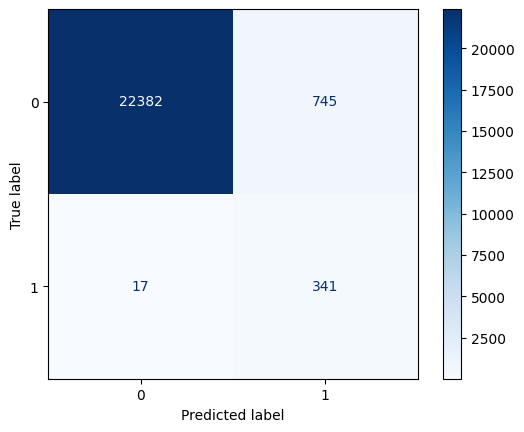

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_train)

# Genereer de confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Print de confusion matrix
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### *GradientBoosting*

In [54]:
# Gradient Boosted Decision Trees model
gbdt = GradientBoostingClassifier()

# Definieer de hyperparameter grid
param_grid_gbdt = {
    'n_estimators': [200, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 3]
}


# GridSearchCV voor GBDT
grid_search_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid_gbdt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_gbdt.fit(X_train, y_train)

best_params_gbdt = grid_search_gbdt.best_params_
print("Beste hyperparameters voor GBDT:", best_params_gbdt)

# Resultaten evalueren
best_gbdt_model = grid_search_gbdt.best_estimator_

Beste hyperparameters voor GBDT: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [91]:
best_model_gbdt = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_split=10, min_samples_leaf=2, n_estimators=200)
best_model_gbdt.fit(X_train, y_train)
y_pred = best_model_gbdt.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.5080891560230403

Confusion Matrix:
[[23011   116]
 [  123   235]]


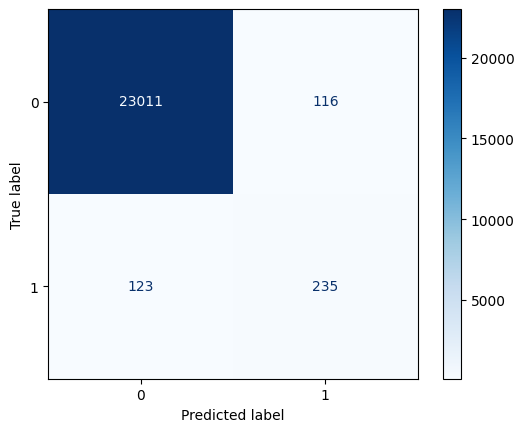

In [73]:
y_pred = best_gbdt_model.predict(X_train)

# Genereer de confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Print de confusion matrix
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#### *XGBoosting*

In [59]:
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb_params = grid_search_xgb.best_params_
print("Beste hyperparameters:", best_xgb_params)

best_xgb_model = grid_search_xgb.best_estimator_

y_pred = best_xgb_model.predict(X_test)
y_pred_prob = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Beste hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Accuracy: 0.9842
ROC AUC Score: 0.8564


In [93]:
best_model_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, colsample_bytree=0.8, subsample=0.8, n_estimators=200)
best_model_xgb.fit(X_train, y_train)
y_pred = best_model_xgb.predict(X_test)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_macro

0.4960192278804266

Confusion Matrix:
[[23127     0]
 [  358     0]]


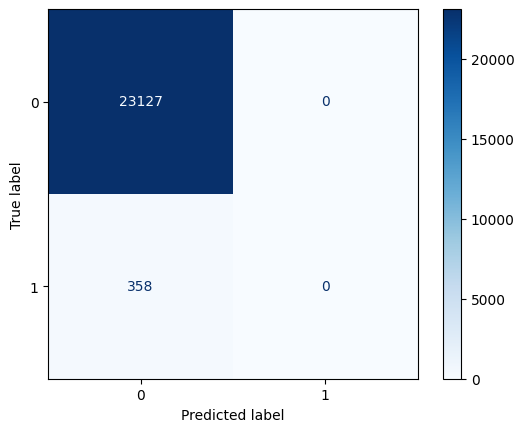

In [74]:
y_pred = best_xgb_model.predict(X_train)

# Genereer de confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Print de confusion matrix
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### ***Vergelijken van modellen***

In [46]:
# Voorspellingen voor Random Forest
y_pred_rf = best_model.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Voorspellingen voor GBDT
y_pred_gbdt = best_gbdt_model.predict(X_test)
print("Gradient Boosted Decision Trees:")
print(classification_report(y_test, y_pred_gbdt))

# Voorspellingen voor XGBoost
y_pred_xgb = best_xgb_model.predict(X_test)
print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Random Forest:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9906
           1       0.00      0.00      0.00       159

    accuracy                           0.98     10065
   macro avg       0.49      0.50      0.50     10065
weighted avg       0.97      0.98      0.98     10065

Gradient Boosted Decision Trees:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9906
           1       0.08      0.01      0.02       159

    accuracy                           0.98     10065
   macro avg       0.53      0.51      0.51     10065
weighted avg       0.97      0.98      0.98     10065

XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9906
           1       0.00      0.00      0.00       159

    accuracy                           0.98     10065
   macro avg       0.49      0.50      0.50     10065
weighted avg     

/Users/jip/.pyenv/versions/3.11.9/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jip/.pyenv/versions/3.11.9/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jip/.pyenv/versions/3.11.9/envs/general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

# **Zelfgemaakte Ensemble**

In [84]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score

# Stel je eerder getrainde modellen samen
# Zorg ervoor dat 'best_model_rf', 'best_gbdt_model', en 'best_xgb_model' je getrainde modellen zijn

# Random Forest (eerder getraind)
best_model_rf = RandomForestClassifier(
    n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=2, max_features='sqrt', class_weight='balanced'
)
best_model_rf.fit(X_train, y_train)

# Gradient Boosting (eerder getraind)
best_gbdt_model = GradientBoostingClassifier(
    learning_rate=0.05, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200
)
best_gbdt_model.fit(X_train, y_train)

# XGBoost (eerder getraind)
best_xgb_model = XGBClassifier(
    learning_rate=0.05, max_depth=5, n_estimators=200, scale_pos_weight=9, eval_metric='logloss'
)
best_xgb_model.fit(X_train, y_train)

# Combineer de eerder getrainde modellen in een VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('rf', best_model_rf),
    ('gbdt', best_gbdt_model),
    ('xgb', best_xgb_model)
], voting='soft')  # Soft voting omdat de modellen probabilistische voorspellingen geven

# Voer het ensemble uit
ensemble.fit(X_train, y_train)

# Voorspellingen doen en evalueren
y_pred = ensemble.predict(X_test)

# Bereken F1-score en ROC AUC
f1_macro = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, ensemble.predict_proba(X_test)[:, 1])

print(f"F1-score (macro): {f1_macro:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


F1-score (macro): 0.5071
ROC AUC Score: 0.8453
